In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

In [2]:
# Load the Excel file
excel_file = pd.ExcelFile('D:\Derivatives Trading\Mini Hang Seng.xlsm')

In [3]:
# Get the sheet you want to read
sheet_name = 'For Python' # Replace with the name of the sheet you want to read
df = excel_file.parse(sheet_name)

In [4]:
# Output data information
print(df)

         Date   PnL Index  Hang Seng  HSI VIX   Returns
0  2023-12-12  100.000000   16374.50    23.90  0.000000
1  2023-12-13   99.959994   16228.75    22.84 -0.000400
2  2023-12-14  100.597928   16403.19    22.36  0.006362
3  2023-12-15  101.180204   16792.19    22.49  0.005771
4  2023-12-18  101.080163   16629.23    22.81 -0.000989
5  2023-12-19  101.100159   16505.00    22.06  0.000198
6  2023-12-20  101.559080   16597.90    21.49  0.004529
7  2023-12-21  101.503070   16625.56    21.93 -0.000552
8  2023-12-22  100.865125   16334.55    23.17 -0.006305
9  2023-12-27  101.978833   16624.84    23.22  0.010981
10 2023-12-28  102.477528   17044.28    22.49  0.004878
11 2023-12-29  102.577461   17047.39    21.94  0.000975
12 2024-01-02  102.208866   16788.55    22.29 -0.003600
13 2024-01-03  101.848298   16646.41    22.07 -0.003534
14 2024-01-04  101.852297   16645.98    21.77  0.000039
15 2024-01-05  101.872291   16535.33    21.47  0.000196
16 2024-01-08  100.511505   16224.45    22.53 -0

In [5]:
#******Plotting setup*****#
# Generate some data
Date = df["Date"]
Date
y1 =df["PnL Index"]
y1
y2 = df["Hang Seng"]
y2

0     16374.50
1     16228.75
2     16403.19
3     16792.19
4     16629.23
5     16505.00
6     16597.90
7     16625.56
8     16334.55
9     16624.84
10    17044.28
11    17047.39
12    16788.55
13    16646.41
14    16645.98
15    16535.33
16    16224.45
17    16190.02
18    16101.80
19    16302.04
20    16244.58
21    16216.33
22    15865.92
23    15276.90
24    15391.79
25    15308.69
26    14961.18
27    15353.98
28    15899.87
29    16211.96
30    15952.23
31    16077.24
32    15703.45
33    15485.07
34    15566.21
35    15533.56
36    15510.01
37    16136.87
38    16081.89
39    15878.07
40    15746.58
41    15879.38
42    15944.63
43    16339.96
44    16155.61
45    16247.51
46    16503.10
Name: Hang Seng, dtype: float64

In [6]:
# Get the maximum PnL value
max_pnl = df['PnL Index'].max()
max_pnl_date = df.loc[df['PnL Index']==max_pnl, 'Date'].values[0]

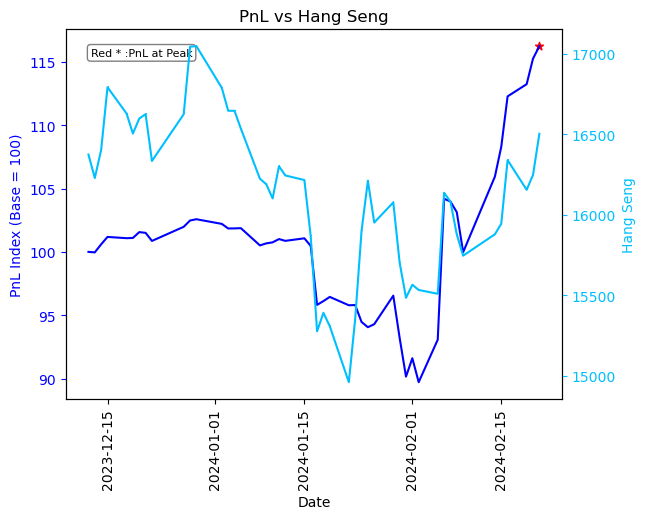

In [7]:
# Create the plot and set the first y-axis (left)
fig, ax1 = plt.subplots()
plt.xticks(rotation=90)
ax1.plot(Date, y1, 'b-')
ax1.scatter(max_pnl_date, max_pnl, color='red', marker='*')
ax1.set_xlabel('Date')
ax1.set_ylabel('PnL Index (Base = 100)', color='b')
ax1.tick_params('y', colors='b')

# Set the second y-axis (right)
ax2 = ax1.twinx()
ax2.plot(Date, y2, color='deepskyblue', marker=',')
ax2.set_ylabel('Hang Seng', color='deepskyblue')
ax2.tick_params('y', colors='deepskyblue')

# Add message box
msg = "Red * :PnL at Peak"
props = dict(boxstyle='round', facecolor='white', alpha=0.5)
ax1.text(0.05, 0.95, msg, transform=ax1.transAxes, fontsize=8,
        verticalalignment='top', bbox=props)

# Show the plot
plt.title('PnL vs Hang Seng')
plt.show()

In [8]:
#Pnl vs HK's Hang Seng VIX
HSI_VIX = df["HSI VIX"]
HSI_VIX 

0     23.90
1     22.84
2     22.36
3     22.49
4     22.81
5     22.06
6     21.49
7     21.93
8     23.17
9     23.22
10    22.49
11    21.94
12    22.29
13    22.07
14    21.77
15    21.47
16    22.53
17    22.05
18    21.85
19    21.82
20    21.60
21    21.75
22    22.51
23    25.72
24    24.60
25    24.13
26    27.52
27    26.78
28    27.41
29    26.28
30    25.48
31    25.70
32    26.22
33    25.79
34    25.80
35    25.54
36    27.07
37    27.61
38    27.07
39    27.22
40    26.73
41    27.73
42    27.17
43    27.53
44    27.35
45    26.23
46    26.14
Name: HSI VIX, dtype: float64

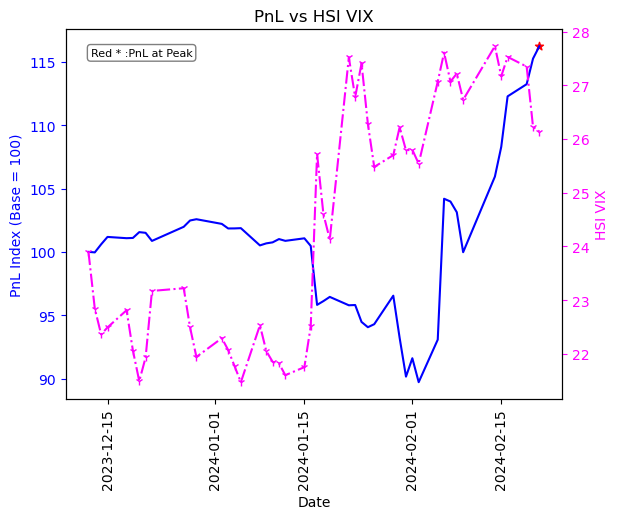

In [9]:
# Create the plot and set the first y-axis (left)
fig, ax1 = plt.subplots()
plt.xticks(rotation=90)
ax1.plot(Date, y1, 'b-')
ax1.scatter(max_pnl_date, max_pnl, color='red', marker='*')
ax1.set_xlabel('Date')
ax1.set_ylabel('PnL Index (Base = 100)', color='b')
ax1.tick_params('y', colors='b')

# Set the second y-axis (right)
ax3 = ax1.twinx()
ax3.plot(Date, HSI_VIX , 'fuchsia', marker='1', linestyle='-.')
ax3.set_ylabel('HSI VIX', color='fuchsia')
ax3.tick_params('y', colors='fuchsia')

# Add message box
msg = "Red * :PnL at Peak"
props = dict(boxstyle='round', facecolor='white', alpha=0.5)
ax1.text(0.05, 0.95, msg, transform=ax1.transAxes, fontsize=8,
        verticalalignment='top', bbox=props)

# Show the plot
plt.title('PnL vs HSI VIX')
plt.show()

In [10]:
##########################################Performance###############################################
#Sharpe ratio
# Read in the portfolio returns data from a CSV file
R_first=df["PnL Index"].iloc[0,]
R_first
R_last = df["PnL Index"].iloc[-1]  #Always excel's actual row-2
R_last
portfolio_returns=(R_last-R_first)/R_first
portfolio_returns

0.16236920436580007

In [11]:
daily_returns=df["Returns"]
daily_returns

0     0.000000
1    -0.000400
2     0.006362
3     0.005771
4    -0.000989
5     0.000198
6     0.004529
7    -0.000552
8    -0.006305
9     0.010981
10    0.004878
11    0.000975
12   -0.003600
13   -0.003534
14    0.000039
15    0.000196
16   -0.013448
17    0.001589
18    0.000794
19    0.002573
20   -0.001388
21    0.001978
22   -0.005970
23   -0.047416
24    0.003117
25    0.003437
26   -0.006881
27    0.000208
28   -0.014036
29   -0.004416
30    0.002541
31    0.023575
32   -0.035110
33   -0.033360
34    0.015976
35   -0.020842
36    0.036735
37    0.112868
38   -0.002093
39   -0.008174
40   -0.031065
41    0.057993
42    0.021948
43    0.036096
44    0.008536
45    0.017627
46    0.008518
Name: Returns, dtype: float64

In [12]:
# Max Drawdown Calculation for PnL Index
cumulative_returns = (1 + df["Returns"]).cumprod()
cumulative_max = cumulative_returns.cummax()
drawdown = (cumulative_returns / cumulative_max) - 1
max_drawdown = drawdown.min()

print("Max Drawdown:", max_drawdown)

Max Drawdown: -0.12823347280700892


In [13]:
# Calculate the excess returns and standard deviation
risk_free_rate = 0.04  # Hong Kong HIBOR
#Source: https://www.hsbc.com.hk/mortgages/tools/hibor-rate/
excess_returns = portfolio_returns - risk_free_rate
std_dev = np.std(daily_returns)
print("Standard Deviation of Daily Return:", std_dev)

Standard Deviation of Daily Return: 0.023931082123374296


In [14]:
# Calculate the Sharpe ratio
Sharpe_Ratio = excess_returns / std_dev
print("Sharpe Ratio:", Sharpe_Ratio)

Sharpe Ratio: 5.113400377590027


In [15]:
#Annualized Sharpe ratio
risk_free_rate_daily = (1 + risk_free_rate) ** (1/250) - 1
risk_free_rate_daily 
average_daily_returns = daily_returns.sum()/250
average_daily_returns
excess_daily_return=average_daily_returns-risk_free_rate_daily 
excess_daily_return

0.00044494619973216927

In [16]:
Annualized_Sharpe_Ratio=excess_daily_return/std_dev*np.sqrt(250)
print("Annualized Sharpe Ratio:", Annualized_Sharpe_Ratio)

Annualized Sharpe Ratio: 0.2939782288439748


In [17]:
# Calculate the Profit Factor
positive_returns = daily_returns[daily_returns > 0].sum()
negative_returns = daily_returns[daily_returns < 0].sum()

# Avoid division by zero
if negative_returns != 0:
    profit_factor = abs(positive_returns / negative_returns)
else:
    profit_factor = float('inf')

print("Profit Factor:", profit_factor)


Profit Factor: 1.628021568939876
